In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats as stats
from sklearn.linear_model import LinearRegression
import math

Q1_2019 = pd.read_csv("/Users/shellylevy/Desktop/IDC/שנה ב/סמסטר ב/פרוייקט מבוסס אנליטיקה/project_data/loan-data-jul-2019-snap/LoanStats_2016Q1.csv", skiprows=1).iloc[:-2]
Q2_2019 = pd.read_csv("/Users/shellylevy/Desktop/IDC/שנה ב/סמסטר ב/פרוייקט מבוסס אנליטיקה/project_data/loan-data-jul-2019-snap/LoanStats_2016Q2.csv", skiprows=1).iloc[:-2]
Q3_2019 = pd.read_csv("/Users/shellylevy/Desktop/IDC/שנה ב/סמסטר ב/פרוייקט מבוסס אנליטיקה/project_data/loan-data-jul-2019-snap/LoanStats_2016Q3.csv", skiprows=1).iloc[:-2]
Q4_2019 = pd.read_csv("/Users/shellylevy/Desktop/IDC/שנה ב/סמסטר ב/פרוייקט מבוסס אנליטיקה/project_data/loan-data-jul-2019-snap/LoanStats_2016Q4.csv", skiprows=1).iloc[:-2]

Q1_2018 = pd.read_csv("/Users/shellylevy/Desktop/IDC/שנה ב/סמסטר ב/פרוייקט מבוסס אנליטיקה/project_data/loan-data-apr-2018-snap/LoanStats_2016Q1.csv", skiprows=1).iloc[:-2]
Q2_2018 = pd.read_csv("/Users/shellylevy/Desktop/IDC/שנה ב/סמסטר ב/פרוייקט מבוסס אנליטיקה/project_data/loan-data-apr-2018-snap/LoanStats_2016Q2.csv", skiprows=1).iloc[:-2]
Q3_2018 = pd.read_csv("/Users/shellylevy/Desktop/IDC/שנה ב/סמסטר ב/פרוייקט מבוסס אנליטיקה/project_data/loan-data-apr-2018-snap/LoanStats_2016Q3.csv", skiprows=1).iloc[:-2]
Q4_2018 = pd.read_csv("/Users/shellylevy/Desktop/IDC/שנה ב/סמסטר ב/פרוייקט מבוסס אנליטיקה/project_data/loan-data-apr-2018-snap/LoanStats_2016Q4.csv", skiprows=1).iloc[:-2]


df_2019 = pd.concat([Q1_2019, Q2_2019, Q3_2019, Q4_2019], axis=0)
df_2018 = pd.concat([Q1_2018, Q2_2018, Q3_2018, Q4_2018], axis=0)

/var/folders/4y/v75tr6k937d026x6qvpx5x3m0000gn/T/ipykernel_43957/256318224.py:9: DtypeWarning: Columns (0,19) have mixed types. Specify dtype option on import or set low_memory=False.
  Q1_2019 = pd.read_csv("/Users/shellylevy/Desktop/IDC/שנה ב/סמסטר ב/פרוייקט מבוסס אנליטיקה/project_data/loan-data-jul-2019-snap/LoanStats_2016Q1.csv", skiprows=1).iloc[:-2]
/var/folders/4y/v75tr6k937d026x6qvpx5x3m0000gn/T/ipykernel_43957/256318224.py:10: DtypeWarning: Columns (0,19,59) have mixed types. Specify dtype option on import or set low_memory=False.
  Q2_2019 = pd.read_csv("/Users/shellylevy/Desktop/IDC/שנה ב/סמסטר ב/פרוייקט מבוסס אנליטיקה/project_data/loan-data-jul-2019-snap/LoanStats_2016Q2.csv", skiprows=1).iloc[:-2]
/var/folders/4y/v75tr6k937d026x6qvpx5x3m0000gn/T/ipykernel_43957/256318224.py:11: DtypeWarning: Columns (0,19,59) have mixed types. Specify dtype option on import or set low_memory=False.
  Q3_2019 = pd.read_csv("/Users/shellylevy/Desktop/IDC/שנה ב/סמסטר ב/פרוייקט מבוסס אנליטיקה/

In [43]:
def entropy(column):
    counts = np.unique(column, return_counts=True)[1]
    probabilities = counts / np.sum(counts)
    return -np.sum(probabilities * np.log2(probabilities))

def information_gain(data, feature, target):
    # Calculate entropy of target variable
    target_entropy = entropy(data[target])
    
    feature_entropy = 0
    feature_values, feature_counts = np.unique(data[feature], return_counts=True)
    for value, count in zip(feature_values, feature_counts):
        subset = data[data[feature] == value]
        feature_entropy += (count / len(data)) * entropy(subset[target])
    
    # Calculate information gain
    return target_entropy - feature_entropy

# Check if both data frame have the same features + make the adjustments if needed

In [44]:
# Define attrs_2018 and attrs_2019 as sets or lists of column names
attrs_2018 = set(df_2018.columns)
attrs_2019 = set(df_2019.columns)

# Find the column names present in attrs_2018 but not in attrs_2019
attrs_2018_only = attrs_2018.difference(attrs_2019)

# Find the column names present in attrs_2019 but not in attrs_2018
attrs_2019_only = attrs_2019.difference(attrs_2018)

# Check if there are no differences in either year
if len(attrs_2018_only) == 0 and len(attrs_2019_only) == 0:
    print("No differences found between attrs_2018 and attrs_2019.")
elif len(attrs_2018_only) == 0:
    print("No differences found in attrs_2018.")
else:
    print("Column names present in attrs_2018 but not in attrs_2019:", attrs_2018_only)

if len(attrs_2019_only) == 0:
    print("No differences found in attrs_2019.")
else:
    print("Column names present in attrs_2019 but not in attrs_2018:", attrs_2019_only)


Column names present in attrs_2018 but not in attrs_2019: {'disbursement_method'}
No differences found in attrs_2019.


# Ensuring Existence and Conversion to Integer of ID Values for Each Instance

In [45]:
na_count_2019 = df_2019['id'].isna().sum()
na_count_2018 = df_2018['id'].isna().sum()

if na_count_2019 == 0 and na_count_2018 == 0:
    print("All instances have an associated ID")
    df_2019['id'] = df_2019['id'].astype(int)
    df_2018['id'] = df_2018['id'].astype(int)
    na_count_2019 = df_2019['id'].isna().sum()
    na_count_2018 = df_2018['id'].isna().sum()
    if na_count_2019 == 0 and na_count_2018 == 0:
        print("ID conversion to int: OK")
else:
    print("Warning: Some instances do not have an associated ID")

All instances have an associated ID
ID conversion to int: OK


# Verify Loan ID Consistency between 2018 and 2019 Data Frames

In [46]:
# Check for duplicate IDs in 2018 and 2019 tables
duplicate_ids_2018 = df_2018['id'].duplicated().sum()
duplicate_ids_2019 = df_2019['id'].duplicated().sum()

if duplicate_ids_2018 == 0:
    print("No duplicate IDs found in the 2018 table.")
else:
    print(f"Duplicate IDs found in the 2018 table: {duplicate_ids_2018}")

if duplicate_ids_2019 == 0:
    print("No duplicate IDs found in the 2019 table.")
else:
    print(f"Duplicate IDs found in the 2019 table: {duplicate_ids_2019}")

id_2019 = df_2019['id'].tolist()
id_2018 = df_2018['id'].tolist()

# Convert the lists to sets for faster comparisons
id_set_2019 = set(id_2019)
id_set_2018 = set(id_2018)

# Find the differences between the sets
missing_ids = id_set_2018.difference(id_set_2019)
extra_ids = id_set_2019.difference(id_set_2018)

# Check if the lengths of the sets are equal, indicating the same number of IDs
same_length = len(id_set_2019) == len(id_set_2018)

if not missing_ids and not extra_ids:
    print("Each instance (loan) from the 2018 table has a corresponding loan in the 2019 table.")
else:
    if missing_ids:
        print("IDs missing in 2019 data:", missing_ids)
    if extra_ids:
        print("Extra IDs in 2019 data:", extra_ids)

No duplicate IDs found in the 2018 table.
No duplicate IDs found in the 2019 table.
Each instance (loan) from the 2018 table has a corresponding loan in the 2019 table.


# Preliminary Assessment of The Features

### Identification of Features Leakage

In [47]:
# Copy the 2018 dataframe and drop the 'disbursement_method' column
new_df_2018 = df_2018.drop('disbursement_method', axis=1).copy()

# Check if the dataframes have the same columns
if set(new_df_2018.columns) != set(df_2019.columns):
    print("Error: Dataframes have different columns")
else:
    # Merge the 2018 and 2019 dataframes on 'id'
    merged_df = pd.merge(new_df_2018, df_2019, on='id', suffixes=('_18', '_19'))

    # Calculate the percentage of changed rows for each non-'id' column
    changed_columns = {}
    for column in new_df_2018.columns:
        if column == 'id':
            continue
        non_na_rows = merged_df[[f"{column}_18", f"{column}_19"]].dropna()
        changed_rows = (non_na_rows[f"{column}_18"] != non_na_rows[f"{column}_19"]).sum()
        percent_changed = changed_rows / len(non_na_rows) * 100
        if percent_changed > 0:
            changed_columns[column] = percent_changed

    # Sort the columns by percent_changed in descending order and print the results
    for column, percent_changed in sorted(changed_columns.items(), key=lambda x: x[1], reverse=True):
        print(f"{column}: {percent_changed:.2f}% changed")

/var/folders/4y/v75tr6k937d026x6qvpx5x3m0000gn/T/ipykernel_43957/4100190959.py:18: RuntimeWarning: invalid value encountered in long_scalars
  percent_changed = changed_rows / len(non_na_rows) * 100
/var/folders/4y/v75tr6k937d026x6qvpx5x3m0000gn/T/ipykernel_43957/4100190959.py:18: RuntimeWarning: invalid value encountered in long_scalars
  percent_changed = changed_rows / len(non_na_rows) * 100
/var/folders/4y/v75tr6k937d026x6qvpx5x3m0000gn/T/ipykernel_43957/4100190959.py:18: RuntimeWarning: invalid value encountered in long_scalars
  percent_changed = changed_rows / len(non_na_rows) * 100
/var/folders/4y/v75tr6k937d026x6qvpx5x3m0000gn/T/ipykernel_43957/4100190959.py:18: RuntimeWarning: invalid value encountered in long_scalars
  percent_changed = changed_rows / len(non_na_rows) * 100
/var/folders/4y/v75tr6k937d026x6qvpx5x3m0000gn/T/ipykernel_43957/4100190959.py:18: RuntimeWarning: invalid value encountered in long_scalars
  percent_changed = changed_rows / len(non_na_rows) * 100
/var/

next_pymnt_d: 100.00% changed
last_credit_pull_d: 83.97% changed
last_fico_range_high: 78.08% changed
last_fico_range_low: 78.08% changed
settlement_status: 62.70% changed
total_pymnt: 62.54% changed
total_pymnt_inv: 62.53% changed
out_prncp: 60.04% changed
out_prncp_inv: 60.04% changed
debt_settlement_flag_date: 59.96% changed
total_rec_int: 57.90% changed
total_rec_prncp: 57.72% changed
last_pymnt_d: 57.32% changed
loan_status: 38.64% changed
last_pymnt_amnt: 33.04% changed
hardship_status: 9.44% changed
recoveries: 6.87% changed
collection_recovery_fee: 6.87% changed
settlement_amount: 3.70% changed
hardship_end_date: 3.50% changed
settlement_date: 3.47% changed
total_rec_late_fee: 3.01% changed
settlement_percentage: 2.74% changed
settlement_term: 2.15% changed
debt_settlement_flag: 1.83% changed
verification_status: 1.62% changed
hardship_flag: 0.09% changed
pymnt_plan: 0.06% changed
installment: 0.02% changed
int_rate: 0.02% changed


new_df_2018 = df_2018.copy()
new_df_2018.drop('disbursement_method', axis=1, inplace=True)

if set(new_df_2018.columns) != set(df_2019.columns):
    print("Error: Dataframes have different columns")
else:
    merged_df = pd.merge(new_df_2018, df_2019, on='id', suffixes=('_18', '_19'))
    changed_columns = {}
    for column in new_df_2018.columns:
        if column == 'id':
            continue
        non_na_rows = merged_df[pd.notna(merged_df[f"{column}_18"]) & pd.notna(merged_df[f"{column}_19"])]
        changed_rows = (non_na_rows[f"{column}_18"] != non_na_rows[f"{column}_19"]).sum()
        percent_changed = changed_rows / len(non_na_rows) * 100
        if percent_changed > 0:
            changed_columns[column] = percent_changed

    # Sort columns by percent_changed in descending order
    sorted_columns = sorted(changed_columns, key=changed_columns.get, reverse=True)
    for column in sorted_columns:
        percent_changed = changed_columns[column]
        print(f"{column}: {percent_changed:.2f}% changed")

In [48]:
features_to_drop = list(changed_columns)
features_to_drop.remove('loan_status')
features_to_drop.remove('int_rate')
features_to_drop.remove('installment')

print(features_to_drop)

['verification_status', 'pymnt_plan', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d', 'last_fico_range_high', 'last_fico_range_low', 'hardship_flag', 'hardship_status', 'hardship_end_date', 'debt_settlement_flag', 'debt_settlement_flag_date', 'settlement_status', 'settlement_date', 'settlement_amount', 'settlement_percentage', 'settlement_term']


We went through the data dictionary and found additional leakage features, these columns only have nan and that's why they didn't come up before.

In [49]:
features_to_drop.append('hardship_reason')
features_to_drop.append('hardship_type')
features_to_drop.append('deferral_term')
features_to_drop.append('hardship_amount')
features_to_drop.append('hardship_start_date')
features_to_drop.append('payment_plan_start_date')
features_to_drop.append('hardship_length')
features_to_drop.append('hardship_dpd')
features_to_drop.append('hardship_loan_status')
features_to_drop.append('orig_projected_additional_accrued_interest')
features_to_drop.append('hardship_payoff_balance_amount')
features_to_drop.append('hardship_last_payment_amount')

features_to_drop.append('funded_amnt')
features_to_drop.append('funded_amnt_inv')

### Filtering irrelevant instances

In [50]:
count_by_status = df_2019['loan_status'].value_counts()
print(count_by_status)

Fully Paid            262810
Current                94178
Charged Off            72193
Late (31-120 days)      3229
In Grace Period         1467
Late (16-30 days)        522
Default                    8
Name: loan_status, dtype: int64


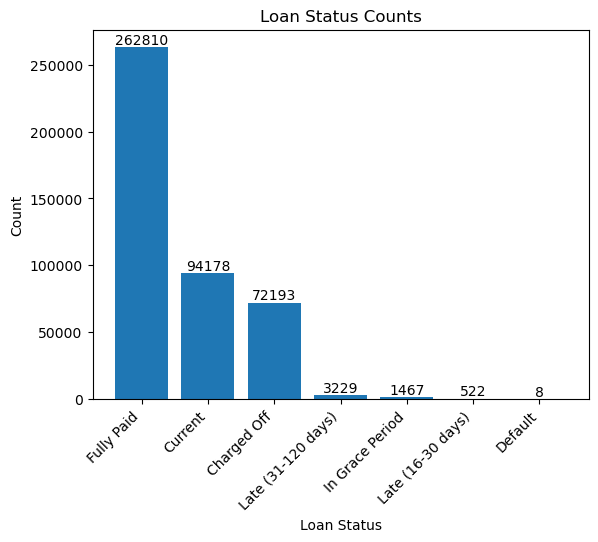

In [51]:
fig, ax = plt.subplots()
bars = ax.bar(count_by_status.index, count_by_status.values)

ax.set_title('Loan Status Counts')
ax.set_xlabel('Loan Status')
ax.set_ylabel('Count')
plt.xticks(rotation=45, ha='right')

for bar, count in zip(bars, count_by_status.values):
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height(), count,
            ha='center', va='bottom')

plt.show()


In [52]:
data = df_2019[df_2019['loan_status'].isin(['Fully Paid', 'Charged Off'])]

In [53]:
data['loan_status'].value_counts()

Fully Paid     262810
Charged Off     72193
Name: loan_status, dtype: int64

## Calculate targed varible

In [54]:
data["T"] = data['term'].replace({' 36 months': 36, ' 60 months': 60})

# Convert "issue_d" and "last_pymnt_d" columns to datetime objects
data["issue_d"] = pd.to_datetime(data["issue_d"])
data["last_pymnt_d"] = pd.to_datetime(data["last_pymnt_d"])
data = data.dropna(subset=['last_pymnt_d'])

# Calculate time difference in years
data["real_time_month"] = (data["last_pymnt_d"] - data["issue_d"]).dt.days / 365.25 *12

data["p/m"] = data["total_pymnt"] / data["real_time_month"]

data["real_time_month"] = np.where(data["real_time_month"] == 0, 1/12, data["real_time_month"])

#df_filtered['yield_total_1'] = (df_filtered['total_pymnt']/df_filtered['funded_amnt']) - 1

#df_filtered['yield_yearly_1'] = ((1+df_filtered['yield_total_1'])**(1/df_filtered["real_time_years"])) - 1

data["yield_2"] = (12/data["T"])*(1/data["funded_amnt"]) * (((data["p/m"])*((1-(1+0.00165158130192022)**data["real_time_month"])/(1-(1+0.00165158130192022))))*(1+0.00165158130192022)**(data["T"]-data["real_time_month"]) - data["funded_amnt"])

data['yield_yearly_1'] = (data['total_pymnt'] - data['funded_amnt'])/data['funded_amnt']*(12/data["real_time_month"])




/var/folders/4y/v75tr6k937d026x6qvpx5x3m0000gn/T/ipykernel_43957/1579848506.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["T"] = data['term'].replace({' 36 months': 36, ' 60 months': 60})
/var/folders/4y/v75tr6k937d026x6qvpx5x3m0000gn/T/ipykernel_43957/1579848506.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["issue_d"] = pd.to_datetime(data["issue_d"])
/var/folders/4y/v75tr6k937d026x6qvpx5x3m0000gn/T/ipykernel_43957/1579848506.py:5: SettingWithCopyWarning: 
A value is trying to be set 

In [55]:
# Grouping data by 'application_type' and 'loan_status'
grouped = data.groupby(['application_type', 'loan_status']).size().unstack().fillna(0)

# Calculate row and column totals
col_totals = grouped.sum(axis=0)
row_totals = grouped.sum(axis=1)

# Calculate percentage values
percentages = grouped.apply(lambda x: x / col_totals * 100, axis=1)
percentages['Total'] = row_totals / row_totals.sum() * 100
percentages = percentages.round(2)

# Styling options
styled_table = percentages.style.background_gradient(cmap='coolwarm', axis=0) \
                      .applymap(lambda x: 'background-color: lightcoral', subset='Charged Off') \
                      .applymap(lambda x: 'background-color: lightgreen', subset='Fully Paid') \
                      .set_caption('Loan Status by Application Type') \
                      .format('{:,.2f}%') \
                      .set_properties(subset=['Charged Off', 'Fully Paid', 'Total'], color='black')

# Display the styled table
styled_table


loan_status,Charged Off,Fully Paid,Total
application_type,,,
Individual,98.05%,98.23%,98.19%
Joint App,1.95%,1.77%,1.81%


In [56]:
# Replace values in 'loan_status' column
data['is_default?'] = (data['loan_status'] == 'Charged Off').astype(int)

# Drop the original 'loan_status' column
data.drop('loan_status', axis=1, inplace=True)

# Move the new 'is fully paid ?' column to the last position
cols = list(data.columns)
cols.remove('is_default?')
cols.append('is_default?')
data = data[cols]

In [57]:
data['yield_over'] = (data['yield_yearly_1'] >= 0.02).astype(int)

In [58]:
features_to_drop.append('real_time_month')
features_to_drop.append('p/m')
features_to_drop.append('T')
print(features_to_drop)
data.drop(features_to_drop, axis=1, inplace=True)

['verification_status', 'pymnt_plan', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d', 'last_fico_range_high', 'last_fico_range_low', 'hardship_flag', 'hardship_status', 'hardship_end_date', 'debt_settlement_flag', 'debt_settlement_flag_date', 'settlement_status', 'settlement_date', 'settlement_amount', 'settlement_percentage', 'settlement_term', 'hardship_reason', 'hardship_type', 'deferral_term', 'hardship_amount', 'hardship_start_date', 'payment_plan_start_date', 'hardship_length', 'hardship_dpd', 'hardship_loan_status', 'orig_projected_additional_accrued_interest', 'hardship_payoff_balance_amount', 'hardship_last_payment_amount', 'funded_amnt', 'funded_amnt_inv', 'real_time_month', 'p/m', 'T']


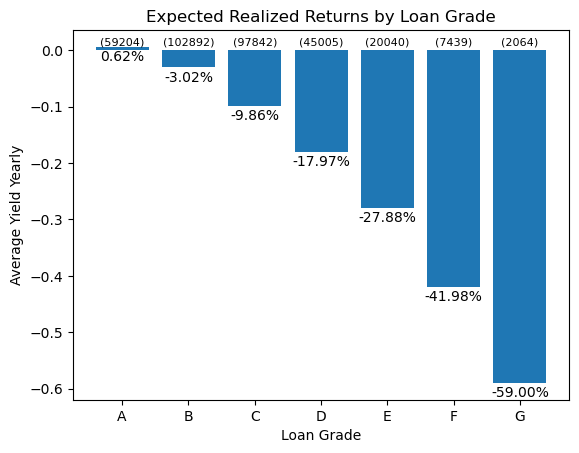

In [59]:
avg_yield_by_grade = data.groupby('grade')['yield_yearly_1'].mean()
count_by_grade = data.groupby('grade')['yield_yearly_1'].count()

fig, ax = plt.subplots()
ax.bar(avg_yield_by_grade.index, avg_yield_by_grade.values)
ax.set_title('Expected Realized Returns by Loan Grade')
ax.set_xlabel('Loan Grade')
ax.set_ylabel('Average Yield Yearly')

for i, v in enumerate(avg_yield_by_grade):
    ax.text(i, v-0.025, f'{v:.2%}', ha='center')

for i, v in enumerate(count_by_grade):
    ax.text(i, max(avg_yield_by_grade), f'({v})', ha='center', va='bottom', fontsize=8)

plt.xticks(rotation=360)
plt.show()


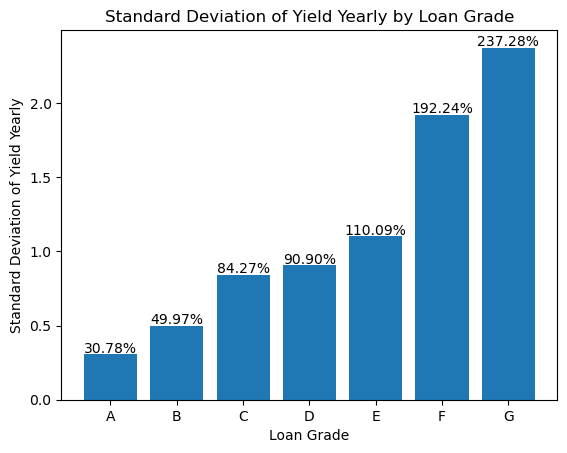

In [60]:

std_yield_by_grade = data.groupby('grade')['yield_yearly_1'].std()

fig, ax = plt.subplots()
ax.bar(std_yield_by_grade.index, std_yield_by_grade.values)
ax.set_title('Standard Deviation of Yield Yearly by Loan Grade')
ax.set_xlabel('Loan Grade')
ax.set_ylabel('Standard Deviation of Yield Yearly')

for i, v in enumerate(std_yield_by_grade):
    ax.text(i, v+0.01, f'{v:.2%}', ha='center')

plt.show()


### Checking for NaN Values in Features

In [61]:
na_percent = {}

# Loop through the columns in data dataframe
for column in data.columns:
    if column == 'id':
        continue
    na_count = data[column].isna().sum()
    na_percent[column] = (na_count / len(data)) * 100

# Filter columns with NaN percentage higher than 0%
na_percent_above_0 = {column: na_percent for column, na_percent in na_percent.items() if na_percent > 0}

# Sort the dictionary by NaN percentages in descending order
sorted_na_percent_above_0 = {column: na_percent for column, na_percent in sorted(na_percent_above_0.items(), key=lambda x: x[1], reverse=True)}

# Print the sorted list of column names and NaN percentages
print("Columns with NaN percentage higher than 0% (sorted):")
for column, na_percent in sorted_na_percent_above_0.items():
    print(f"{column}: {na_percent:.2f}% NaN Percent")

Columns with NaN percentage higher than 0% (sorted):
member_id: 100.00% NaN Percent
revol_bal_joint: 100.00% NaN Percent
sec_app_fico_range_low: 100.00% NaN Percent
sec_app_fico_range_high: 100.00% NaN Percent
sec_app_earliest_cr_line: 100.00% NaN Percent
sec_app_inq_last_6mths: 100.00% NaN Percent
sec_app_mort_acc: 100.00% NaN Percent
sec_app_open_acc: 100.00% NaN Percent
sec_app_revol_util: 100.00% NaN Percent
sec_app_open_act_il: 100.00% NaN Percent
sec_app_num_rev_accts: 100.00% NaN Percent
sec_app_chargeoff_within_12_mths: 100.00% NaN Percent
sec_app_collections_12_mths_ex_med: 100.00% NaN Percent
sec_app_mths_since_last_major_derog: 100.00% NaN Percent
desc: 99.99% NaN Percent
dti_joint: 98.19% NaN Percent
annual_inc_joint: 98.19% NaN Percent
verification_status_joint: 98.19% NaN Percent
mths_since_last_record: 80.27% NaN Percent
mths_since_recent_bc_dlq: 74.52% NaN Percent
mths_since_last_major_derog: 70.83% NaN Percent
mths_since_recent_revol_delinq: 63.90% NaN Percent
mths_sin

In [62]:
# Create an empty list to store column names
features_to_drop = []
features_to_test=[]

# Loop through the columns in changed_columns dictionary
for column, na_percent in sorted_na_percent_above_0.items():
    if na_percent > 45:
        features_to_drop.append(column)
        if column in features_to_test:
            features_to_test.remove(column)
    else:
        features_to_test.append(column)

In [63]:
print(features_to_drop)
data.drop(features_to_drop, axis=1, inplace=True)

['member_id', 'revol_bal_joint', 'sec_app_fico_range_low', 'sec_app_fico_range_high', 'sec_app_earliest_cr_line', 'sec_app_inq_last_6mths', 'sec_app_mort_acc', 'sec_app_open_acc', 'sec_app_revol_util', 'sec_app_open_act_il', 'sec_app_num_rev_accts', 'sec_app_chargeoff_within_12_mths', 'sec_app_collections_12_mths_ex_med', 'sec_app_mths_since_last_major_derog', 'desc', 'dti_joint', 'annual_inc_joint', 'verification_status_joint', 'mths_since_last_record', 'mths_since_recent_bc_dlq', 'mths_since_last_major_derog', 'mths_since_recent_revol_delinq', 'mths_since_last_delinq']


### Identifying Features with Identical Values

In [64]:
features_to_drop = []
same_value_cols = []
for column in data.columns:
    if column == 'id':
        continue
    unique_values = data[column].nunique()
    if unique_values == 1 and data[column].isna().sum() == 0:
        same_value_cols.append(column)

# Print columns with the same value for the entire length of the column
print("Columns with the same value for the entire length of the column:")
for col in same_value_cols:
    features_to_drop.append(col)
    if column in features_to_test:
        features_to_test.remove(column)
    print(col)

Columns with the same value for the entire length of the column:
policy_code


In [65]:
print(features_to_drop)
data.drop(features_to_drop, axis=1, inplace=True)

['policy_code']


### business relevent

In [66]:
features_to_drop=['emp_title','url','title','zip_code']
data.drop(features_to_drop, axis=1, inplace=True)

# Check the data types

In [67]:
pd.set_option("display.max_rows", None)
print(data.dtypes)
pd.reset_option("display.max_rows")

id                                     int64
loan_amnt                            float64
term                                  object
int_rate                              object
installment                          float64
grade                                 object
sub_grade                             object
emp_length                            object
home_ownership                        object
annual_inc                           float64
issue_d                       datetime64[ns]
purpose                               object
addr_state                            object
dti                                  float64
delinq_2yrs                          float64
earliest_cr_line                      object
fico_range_low                       float64
fico_range_high                      float64
inq_last_6mths                       float64
open_acc                             float64
pub_rec                              float64
revol_bal                            float64
revol_util

In [68]:
data["term"] = data['term'].replace({' 36 months': 36, ' 60 months': 60})
data['int_rate'] = data['int_rate'].str.replace('%', '').astype('float64') / 100.0
data["emp_length"] = data["emp_length"].replace({"< 1 year": "0", "10+ years": "10", np.nan: np.nan})
data["emp_length"] = data["emp_length"].str.extract('(\d+)').astype(float)
data['revol_util'] = data['revol_util'].str.replace('%', '').astype('float64') / 100.0

## Calculating Entropy 

In [69]:
continuous_vars = data.select_dtypes(include=['float', 'int'])

selected_vars = continuous_vars.loc[:, continuous_vars.nunique() < 10]

print(selected_vars.columns)

Index(['term', 'inq_last_6mths', 'acc_now_delinq', 'chargeoff_within_12_mths',
       'num_tl_120dpd_2m', 'num_tl_30dpd', 'is_default?', 'yield_over'],
      dtype='object')


In [70]:
selected_vars = selected_vars.astype('object')

In [71]:
for col in selected_vars.columns:
    entropy = stats.entropy(selected_vars[col].value_counts(normalize=True))
    print(f"Entropy of {col}: {entropy}")

Entropy of term: 0.49374916985417905
Entropy of inq_last_6mths: 1.0356382480227713
Entropy of acc_now_delinq: 0.04005835428001012
Entropy of chargeoff_within_12_mths: 0.050553551491998534
Entropy of num_tl_120dpd_2m: 0.00832116258143788
Entropy of num_tl_30dpd: 0.027893328061617206
Entropy of is_default?: 0.5195815038756285
Entropy of yield_over: 0.5164294642557854


In [72]:
def yield_over_percentages(col):
    col_counts_normal = data[col].value_counts(normalize=True)
    col_counts = data[col].value_counts()

    yield_over_percentages = []
    for idx in col_counts.index:
        yield_over_percentages.append(1 - (data[data[col] == idx]['yield_over'].mean()))

    df = pd.DataFrame({col: col_counts.index, 'Count': col_counts.values,'normalize count':col_counts_normal.values ,'yield over percentages': yield_over_percentages})
    return(df)

In [73]:
print(yield_over_percentages('inq_last_6mths'))

   inq_last_6mths   Count  normalize count  yield over percentages
0             0.0  202216         0.604559                0.189802
1             1.0   88930         0.265871                0.229900
2             2.0   29237         0.087409                0.264015
3             3.0    9923         0.029667                0.301622
4             4.0    3131         0.009361                0.316832
5             5.0    1048         0.003133                0.323473


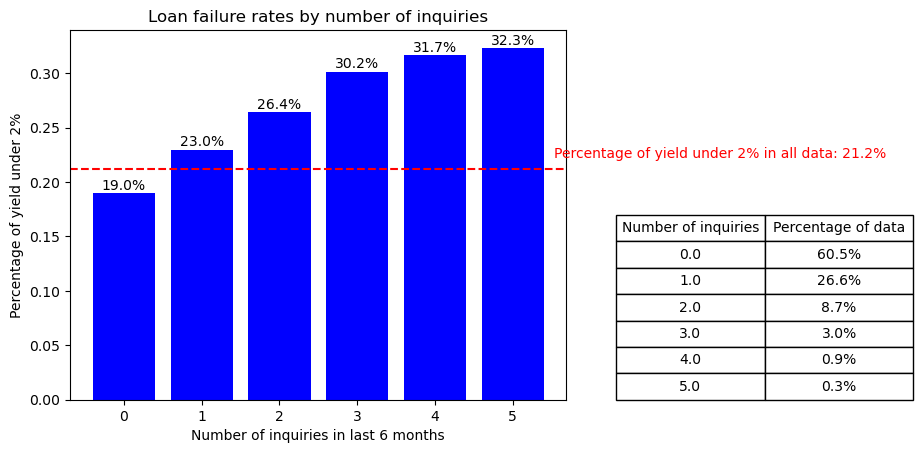

In [83]:
df = yield_over_percentages('inq_last_6mths')

fig, ax = plt.subplots()

ax.bar(df['inq_last_6mths'], df['yield over percentages'], color='blue')

for i, count in enumerate(df['normalize count']):
    ax.text(i, df['yield over percentages'][i]+0.003 , f'{df["yield over percentages"][i]*100:.1f}%', ha='center')

ax.set_xlabel('Number of inquiries in last 6 months')
ax.set_ylabel('Percentage of yield under 2%')
ax.set_title('Loan failure rates by number of inquiries')
ax.set_xticks(df['inq_last_6mths'])

table_data = [['Number of inquiries', 'Percentage of data']] + [[f'{idx}', f'{count*100:.1f}%'] for idx, count in zip(df['inq_last_6mths'], df['normalize count'])]
table = ax.table(cellText=table_data, loc='right', colWidths=[0.4, 0.4], cellLoc='center', bbox=[1.1, 0, 0.6, 0.5])

table.auto_set_font_size(False)
table.set_fontsize(10)

pop_mean = 1 - data['yield_over'].mean()
ax.axhline(pop_mean, color='red', linestyle='--')
ax.text(len(df['inq_last_6mths'])+3.8, pop_mean+0.01, f'Percentage of yield under 2% in all data: {pop_mean*100:.1f}%', color='red', ha='right')

plt.show()


"inq_last_6mths" represents the number of inquiries made on a borrower's credit report in the past 6 months, excluding inquiries related to auto and mortgage loans. This variable is relevant for predicting loan defaults because a high number of inquiries may indicate that the borrower has recently applied for multiple loans, which could be a sign of financial distress or over-extension. While a high number of inquiries generally lead to higher default rates, for certain cases with high inquiries, they do not represent a large percentage of the data. Therefore, Since 0 has a relatively low failure rate, 1 percent has an average failure rate and >1 percent has a relatively high failure rate we convert this to categorical variable - 0,1,>1.

In [34]:
data['inq_last_6mths_cat'] = pd.cut(data['inq_last_6mths'], bins=[-1, 0, 1, np.inf], labels=['No recent inquiries', 'Low recent inquiries', 'High recent inquiries'])

In [35]:
data.drop('inq_last_6mths', axis=1, inplace=True)

In [36]:
print(yield_over_percentages('acc_now_delinq'))

   acc_now_delinq   Count  normalize count  yield over percentages
0             0.0  332359         0.993641                0.211858
1             1.0    2006         0.005997                0.215354
2             2.0     105         0.000314                0.200000
3             3.0      12         0.000036                0.250000
4             4.0       4         0.000012                0.000000


In [37]:
print(yield_over_percentages('chargeoff_within_12_mths'))

   chargeoff_within_12_mths   Count  normalize count  yield over percentages
0                       0.0  331746         0.991808                0.211671
1                       1.0    2508         0.007498                0.235646
2                       2.0     164         0.000490                0.237805
3                       3.0      39         0.000117                0.256410
4                       4.0      17         0.000051                0.294118
5                       5.0       6         0.000018                0.333333
6                       7.0       2         0.000006                0.000000
7                       6.0       2         0.000006                0.500000
8                       9.0       2         0.000006                0.000000


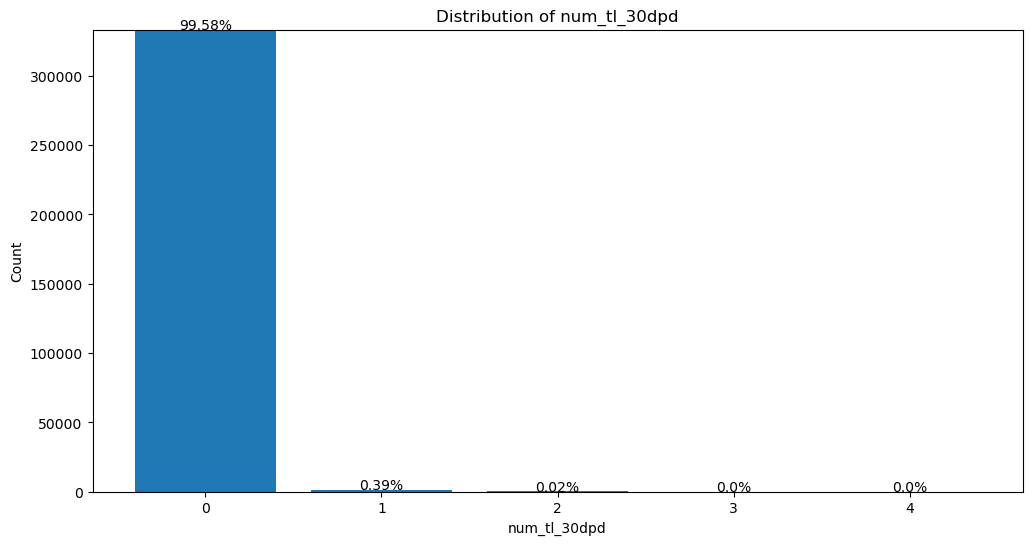

In [38]:
df = yield_over_percentages('num_tl_30dpd')

# plot bar graph
plt.figure(figsize=(12,6))
plt.bar(df['num_tl_30dpd'], df['Count'], align='center')
plt.xticks(df['num_tl_30dpd'], rotation=360)  # rotate x-axis label 360 degrees
plt.xlabel('num_tl_30dpd')
plt.ylabel('Count')
plt.ylim(top=max(df['Count'])+100)
plt.title('Distribution of num_tl_30dpd')
 
# add normalize count as labels on each bar in percentages
for i, v in enumerate(df['normalize count']):
    plt.text(i, df['Count'][i] + 5, str(round(v*100, 2))+'%', ha='center')

# remove grid
plt.grid(False)

plt.show()


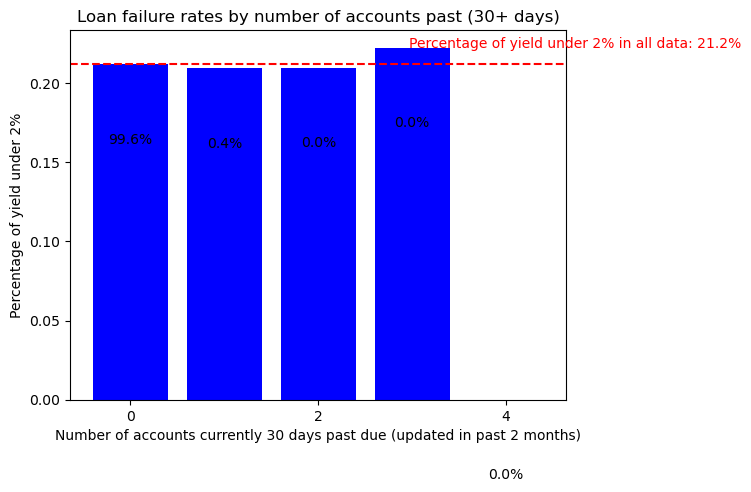

In [41]:
df = yield_over_percentages('num_tl_30dpd')

fig, ax = plt.subplots()

ax.bar(df['num_tl_30dpd'], df['yield over percentages'], color='blue')

ax.set_xlabel('Number of accounts currently 30 days past due (updated in past 2 months)')
ax.set_ylabel('Percentage of yield under 2%')
ax.set_title('Loan failure rates by number of accounts past (30+ days)')
ax.set_xticks(df['num_tl_30dpd'][::2])  # show every other x-axis tick label

pop_mean = 1 - data['yield_over'].mean()
ax.axhline(pop_mean, color='red', linestyle='--')
ax.text(len(df['num_tl_30dpd'])+1.5, pop_mean+0.01, f'Percentage of yield under 2% in all data: {pop_mean*100:.1f}%', color='red', ha='right')

# add new column with count percentages
for i, v in enumerate(df['normalize count']):
    ax.text(i, df['yield over percentages'][i] - 0.05, f"{v*100:.1f}%", color='black', ha='center', fontsize=10)

plt.show()


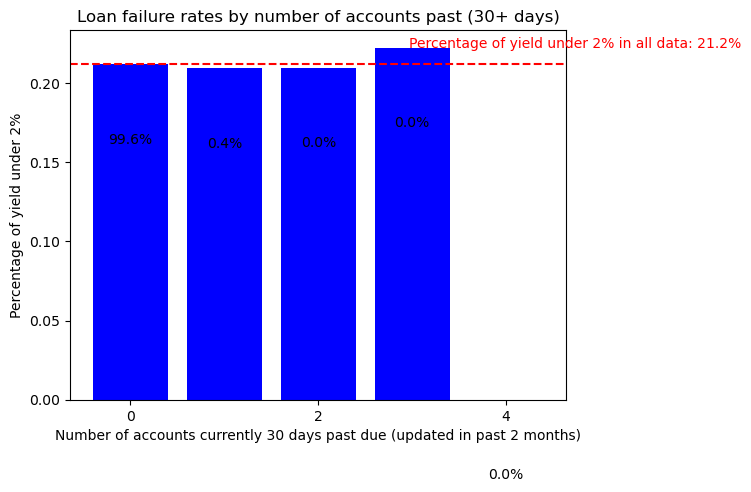

In [40]:
df = yield_over_percentages('num_tl_30dpd')

fig, ax = plt.subplots()

ax.bar(df['num_tl_30dpd'], df['yield over percentages'], color='blue')

ax.set_xlabel('Number of accounts currently 30 days past due (updated in past 2 months)')
ax.set_ylabel('Percentage of yield under 2%')
ax.set_title('Loan failure rates by number of accounts past (30+ days)')
ax.set_xticks(df['num_tl_30dpd'][::2])  # show every other x-axis tick label

pop_mean = 1 - data['yield_over'].mean()
ax.axhline(pop_mean, color='red', linestyle='--')
ax.text(len(df['num_tl_30dpd'])+1.5, pop_mean+0.01, f'Percentage of yield under 2% in all data: {pop_mean*100:.1f}%', color='red', ha='right')

# add new column with count percentages
for i, v in enumerate(df['normalize count']):
    ax.text(i, df['yield over percentages'][i] - 0.05, f"{v*100:.1f}%", color='black', ha='center', fontsize=10)

plt.show()


In [40]:
print(yield_over_percentages('num_tl_120dpd_2m'))

   num_tl_120dpd_2m   Count  normalize count  yield over percentages
0               0.0  317907         0.998972                0.208844
1               1.0     311         0.000977                0.199357
2               2.0      14         0.000044                0.071429
3               3.0       1         0.000003                0.000000
4               4.0       1         0.000003                0.000000


In [41]:
print(yield_over_percentages('num_tl_30dpd'))

   num_tl_30dpd   Count  normalize count  yield over percentages
0           0.0  333095         0.995841                0.211885
1           1.0    1319         0.003943                0.209249
2           2.0      62         0.000185                0.209677
3           3.0       9         0.000027                0.222222
4           4.0       1         0.000003                0.000000


In general, the failure percentages here are around the average failure percentage for each category and also the absolute majority of the categories represent less than half a percent of the data (the population) = low entropy, so we will remove these columns

In [42]:
features_to_drop=['acc_now_delinq','chargeoff_within_12_mths','num_tl_120dpd_2m','num_tl_30dpd']
data.drop(features_to_drop, axis=1, inplace=True)

In [43]:
for col in data.columns:
    entropy = stats.entropy(data[col].value_counts(normalize=True))
    if entropy < 0.5:
        print(f"Entropy of {col}: {entropy}")

Entropy of term: 0.49374916985417905
Entropy of collections_12_mths_ex_med: 0.10343279510587126
Entropy of application_type: 0.09041584939031602
Entropy of delinq_amnt: 0.06973593606696797
Entropy of num_tl_90g_dpd_24m: 0.28152714340156115
Entropy of pub_rec_bankruptcies: 0.44310701240739403
Entropy of tax_liens: 0.2254086133556975


In [44]:
print(yield_over_percentages('term'))

   term   Count  normalize count  yield over percentages
0    36  269177         0.804748                0.175479
1    60   65309         0.195252                0.361880


For now we will keep this variable (you can see higher than average failure rates for loans taken for 60 months) and they represent 20% of the data - quite a bit.

In [45]:
print(yield_over_percentages('collections_12_mths_ex_med'))

    collections_12_mths_ex_med   Count  normalize count  \
0                          0.0  327884         0.980262   
1                          1.0    6105         0.018252   
2                          2.0     402         0.001202   
3                          3.0      48         0.000144   
4                          4.0      24         0.000072   
5                          5.0       8         0.000024   
6                          6.0       5         0.000015   
7                          7.0       4         0.000012   
8                         11.0       1         0.000003   
9                         12.0       1         0.000003   
10                        20.0       1         0.000003   
11                        10.0       1         0.000003   
12                         9.0       1         0.000003   
13                         8.0       1         0.000003   

    yield over percentages  
0                 0.210989  
1                 0.256020  
2                 0.268657 

Since 98% of the data is under the same category, we drop this column.

In [46]:
data.drop('collections_12_mths_ex_med', axis=1, inplace=True)

In [47]:
print(yield_over_percentages('application_type'))

  application_type   Count  normalize count  yield over percentages
0       Individual  328443         0.981933                0.211571
1        Joint App    6043         0.018067                0.228363


We found very few joint loan applications, so we removed them from our analysis to avoid bias and account for potential differences between individual and joint loans.

In [48]:
data = data[data['application_type'] == 'Individual']
data.drop('application_type', axis=1, inplace=True)

In [49]:
print(yield_over_percentages('delinq_amnt') )

      delinq_amnt   Count  normalize count  yield over percentages
0             0.0  326651         0.994544                0.211470
1         65000.0      40         0.000122                0.325000
2            25.0      24         0.000073                0.208333
3            56.0      19         0.000058                0.263158
4            30.0      19         0.000058                0.263158
...           ...     ...              ...                     ...
1009       6089.0       1         0.000003                0.000000
1010       5332.0       1         0.000003                1.000000
1011      36609.0       1         0.000003                0.000000
1012       1087.0       1         0.000003                0.000000
1013       2141.0       1         0.000003                1.000000

[1014 rows x 4 columns]


An absolute majority of our data (over 99 percent) has a value of 0. So we will remove this feature from the data

In [50]:
data.drop('delinq_amnt', axis=1, inplace=True)

In [51]:
print(yield_over_percentages('num_tl_90g_dpd_24m') )

    num_tl_90g_dpd_24m   Count  normalize count  yield over percentages
0                  0.0  308970         0.940711                0.210040
1                  1.0   14491         0.044120                0.234628
2                  2.0    2797         0.008516                0.247050
3                  3.0     823         0.002506                0.234508
4                  4.0     469         0.001428                0.219616
5                  5.0     255         0.000776                0.227451
6                  6.0     209         0.000636                0.234450
7                  7.0     114         0.000347                0.236842
8                  8.0      77         0.000234                0.207792
9                  9.0      70         0.000213                0.242857
10                10.0      50         0.000152                0.260000
11                11.0      27         0.000082                0.222222
12                12.0      22         0.000067                0

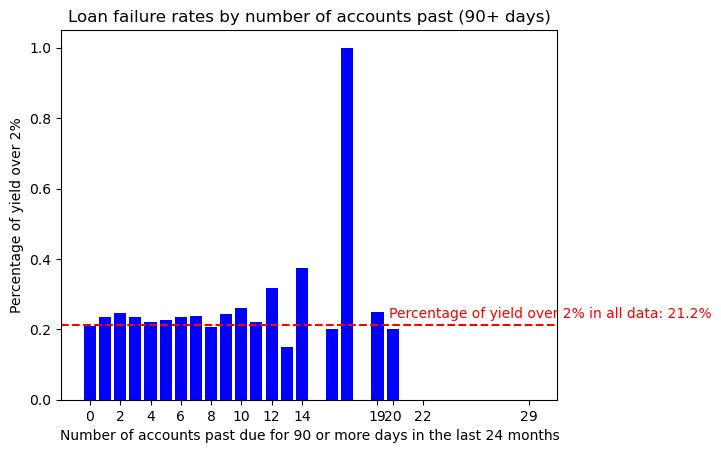

In [52]:
df = yield_over_percentages('num_tl_90g_dpd_24m')

fig, ax = plt.subplots()

ax.bar(df['num_tl_90g_dpd_24m'], df['yield over percentages'], color='blue')

ax.set_xlabel('Number of accounts past due for 90 or more days in the last 24 months')
ax.set_ylabel('Percentage of yield over 2%')
ax.set_title('Loan failure rates by number of accounts past (90+ days)')
ax.set_xticks(df['num_tl_90g_dpd_24m'][::2])  # show every other x-axis tick label

pop_mean = 1 - data['yield_over'].mean()
ax.axhline(pop_mean, color='red', linestyle='--')
ax.text(len(df['num_tl_90g_dpd_24m'])+18.1, pop_mean+0.02, f'Percentage of yield over 2% in all data: {pop_mean*100:.1f}%', color='red', ha='right')

plt.show()


The variable "num_tl_90g_dpd_24m" represents the number of accounts a borrower has that are 90 or more days past due in the last 24 months. This variable is relevant for predicting loan defaults because a high number of accounts past due may indicate a history of not repaying debts on time, which increases the risk of default. While high numbers of accounts past due generally lead to higher failure rates, for certain cases with a high number of accounts past due, they do not represent a large percentage of the data. Therefore, we can make this variable binary, where 0 represents no accounts past due and 1 represents a history of having accounts past due for 90 or more days in the last 24 months.

In [53]:
data["has_past_due_accounts_90g_24m"] = data["num_tl_90g_dpd_24m"].apply(lambda x: 1 if x > 0 else 0)
data.drop('num_tl_90g_dpd_24m', axis=1, inplace=True)

In [54]:
print(yield_over_percentages('pub_rec_bankruptcies') )

   pub_rec_bankruptcies   Count  normalize count  yield over percentages
0                   0.0  283905         0.864397                0.205960
1                   1.0   41047         0.124975                0.247302
2                   2.0    2671         0.008132                0.248596
3                   3.0     587         0.001787                0.233390
4                   4.0     156         0.000475                0.250000
5                   5.0      55         0.000167                0.254545
6                   6.0      15         0.000046                0.466667
7                   8.0       4         0.000012                0.500000
8                   7.0       2         0.000006                1.000000
9                   9.0       1         0.000003                0.000000


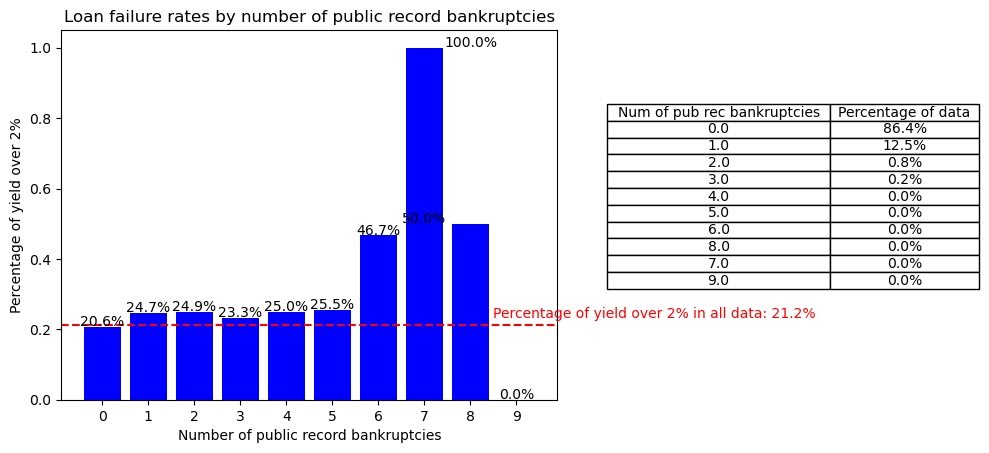

In [55]:
df = yield_over_percentages('pub_rec_bankruptcies')

fig, ax = plt.subplots()

ax.bar(df['pub_rec_bankruptcies'], df['yield over percentages'], color='blue')

for i, count in enumerate(df['normalize count']):
    ax.text(i, df['yield over percentages'][i]+0.003 , f'{df["yield over percentages"][i]*100:.1f}%', ha='center')

ax.set_xlabel('Number of public record bankruptcies')
ax.set_ylabel('Percentage of yield over 2%')
ax.set_title('Loan failure rates by number of public record bankruptcies')
ax.set_xticks(df['pub_rec_bankruptcies'])

pop_mean = 1 - data['yield_over'].mean()
ax.axhline(pop_mean, color='red', linestyle='--')
ax.text(len(df['pub_rec_bankruptcies'])+5.5, pop_mean+0.02, f'Percentage of yield over 2% in all data: {pop_mean*100:.1f}%', color='red', ha='right')

table_data = [['Num of pub rec bankruptcies', 'Percentage of data']] + [[f'{idx}', f'{count*100:.1f}%'] for idx, count in zip(df['pub_rec_bankruptcies'], df['normalize count'])]
table = ax.table(cellText=table_data, loc='right', colWidths=[0.6, 0.4], cellLoc='center', bbox=[1.1, 0.3, 0.75, 0.5])

table.auto_set_font_size(False)
table.set_fontsize(10)

plt.show()


"Pub_rec_bankruptcies" represents the number of public record bankruptcies a borrower has. This variable is relevant for predicting loan defaults because having a history of bankruptcy may indicate that the borrower has experienced financial difficulties in the past and may be at a higher risk of defaulting on the loan. Therefore, higher values of "pub_rec_bankruptcies" may be associated with a higher risk of default. Therefore, we can make this variable binary, where 0 represents no public record bankruptcies and 1 represents a more then one public record bankruptcies

In [56]:
data["has_pub_rec_bankruptcies"] = data["pub_rec_bankruptcies"].apply(lambda x: 1 if x > 0 else 0)
data.drop('pub_rec_bankruptcies', axis=1, inplace=True)

In [57]:
print(yield_over_percentages('tax_liens'))

    tax_liens   Count  normalize count  yield over percentages
0         0.0  314051         0.956181                0.210342
1         1.0    9781         0.029780                0.242511
2         2.0    2673         0.008138                0.224093
3         3.0     951         0.002895                0.228181
4         4.0     451         0.001373                0.272727
5         5.0     249         0.000758                0.224900
6         6.0     112         0.000341                0.178571
7         7.0      59         0.000180                0.271186
8         8.0      34         0.000104                0.205882
9         9.0      18         0.000055                0.166667
10       10.0      14         0.000043                0.357143
11       11.0      14         0.000043                0.285714
12       12.0       9         0.000027                0.000000
13       15.0       4         0.000012                0.250000
14       13.0       3         0.000009                0

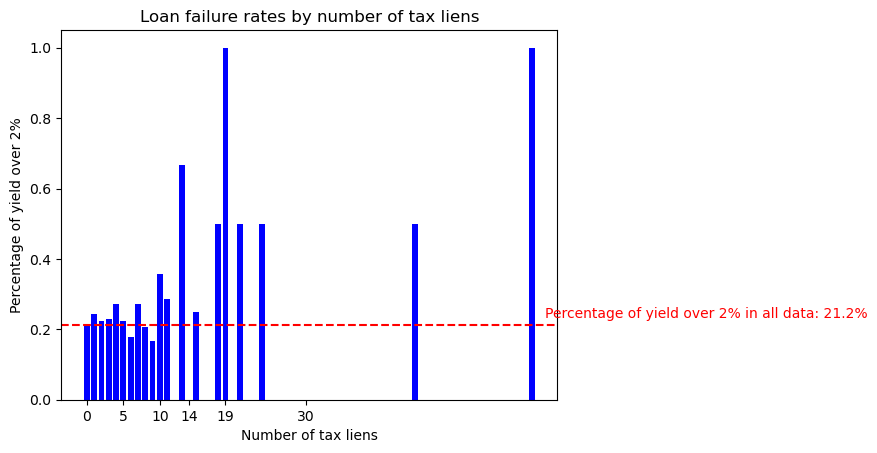

In [58]:
df = yield_over_percentages('tax_liens')

fig, ax = plt.subplots()

ax.bar(df['tax_liens'], df['yield over percentages'], color='blue')

ax.set_xlabel('Number of tax liens')
ax.set_ylabel('Percentage of yield over 2%')
ax.set_title('Loan failure rates by number of tax liens')
ax.set_xticks(df['tax_liens'][::5])  # show every other x-axis tick label

pop_mean = 1 - data['yield_over'].mean()
ax.axhline(pop_mean, color='red', linestyle='--')
ax.text(len(df['tax_liens'])+78, pop_mean+0.02, f'Percentage of yield over 2% in all data: {pop_mean*100:.1f}%', color='red', ha='right')

plt.show()


"tax_liens" represents the number of tax liens a borrower has. This variable is relevant for predicting loan defaults because having a history of tax liens may indicate that the borrower has had difficulties paying taxes in the past and may be at a higher risk of defaulting on the loan. Therefore, higher values of "tax_liens" may be associated with a higher risk of default. We can make this variable binary, where 0 represents no tax liens and 1 represents one or more tax liens.

In [59]:
data["has_tax_liens"] = data["tax_liens"].apply(lambda x: 1 if x > 0 else 0)
data.drop('tax_liens', axis=1, inplace=True)

# Handling missing values

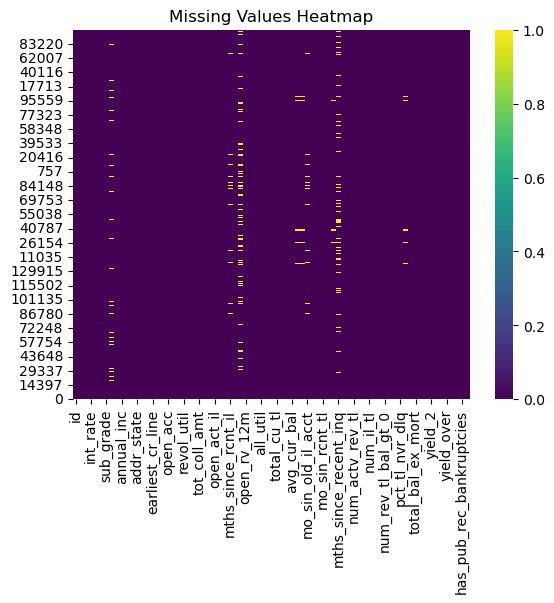

In [60]:
sns.heatmap(data.isnull(), cmap='viridis')
plt.title('Missing Values Heatmap')
plt.ylim(0, len(data))
plt.show()

In [61]:
na_percent = {}

# Loop through the columns in data dataframe
for column in data.columns:
    if column == 'id':
        continue
    na_count = data[column].isna().sum()
    na_percent[column] = (na_count / len(data)) * 100

# Filter columns with NaN percentage higher than 0%
na_percent_above_0 = {column: na_percent for column, na_percent in na_percent.items() if na_percent > 0}

# Sort the dictionary by NaN percentages in descending order
sorted_na_percent_above_0 = {column: na_percent for column, na_percent in sorted(na_percent_above_0.items(), key=lambda x: x[1], reverse=True)}

# Print the sorted list of column names and NaN percentages
print("Columns with NaN percentage higher than 0% (sorted):")
for column, na_percent in sorted_na_percent_above_0.items():
    print(f"{column}: {na_percent:.2f}% NaN Percent")


Columns with NaN percentage higher than 0% (sorted):
il_util: 13.20% NaN Percent
mths_since_recent_inq: 9.83% NaN Percent
emp_length: 6.51% NaN Percent
mths_since_rcnt_il: 2.69% NaN Percent
mo_sin_old_il_acct: 2.68% NaN Percent
bc_util: 1.13% NaN Percent
percent_bc_gt_75: 1.09% NaN Percent
bc_open_to_buy: 1.08% NaN Percent
mths_since_recent_bc: 1.01% NaN Percent
revol_util: 0.06% NaN Percent
all_util: 0.02% NaN Percent
open_acc_6m: 0.02% NaN Percent
total_cu_tl: 0.02% NaN Percent
inq_last_12m: 0.02% NaN Percent
open_act_il: 0.02% NaN Percent
open_il_12m: 0.02% NaN Percent
open_il_24m: 0.02% NaN Percent
total_bal_il: 0.02% NaN Percent
open_rv_12m: 0.02% NaN Percent
open_rv_24m: 0.02% NaN Percent
max_bal_bc: 0.02% NaN Percent
inq_fi: 0.02% NaN Percent
inq_last_6mths_cat: 0.00% NaN Percent


Since this is a very small amount of instances, we will remove all instances with a percentage of missing values smaller than 0.07%

In [62]:
data_t=data.copy()
i=0
initial_instances = data_t.shape[0]

for column, na_percent in sorted_na_percent_above_0.items():
    if na_percent < 0.07:
        i+=1
        data_t.dropna(subset=[column], inplace=True)

final_instances = data_t.shape[0]
removed_number = (initial_instances - final_instances)
removed_percent = removed_number / initial_instances * 100


print('there is:',len(na_percent_above_0.keys()),"featuers with missing value")
print('Of these:',removed_number,"have less than 0.07% percentage of missing values and it",removed_percent,"Percentage of the data")

there is: 23 featuers with missing value
Of these: 258 have less than 0.07% percentage of missing values and it 0.07855244288963381 Percentage of the data


In [63]:
for column, na_percent in sorted_na_percent_above_0.items():
    if na_percent < 0.07:
        data.dropna(subset=[column], inplace=True)

In [64]:
na_percent = {}

# Loop through the columns in data dataframe
for column in data.columns:
    if column == 'id':
        continue
    na_count = data[column].isna().sum()
    na_percent[column] = (na_count / len(data)) * 100

# Filter columns with NaN percentage higher than 0%
na_percent_above_0 = {column: na_percent for column, na_percent in na_percent.items() if na_percent > 0}

# Sort the dictionary by NaN percentages in descending order
sorted_na_percent_above_0 = {column: na_percent for column, na_percent in sorted(na_percent_above_0.items(), key=lambda x: x[1], reverse=True)}

# Print the sorted list of column names and NaN percentages
print("Columns with NaN percentage higher than 0% (sorted):")
for column, na_percent in sorted_na_percent_above_0.items():
    print(f"{column}: {na_percent:.2f}% NaN Percent")

Columns with NaN percentage higher than 0% (sorted):
il_util: 13.19% NaN Percent
mths_since_recent_inq: 9.82% NaN Percent
emp_length: 6.51% NaN Percent
mths_since_rcnt_il: 2.68% NaN Percent
mo_sin_old_il_acct: 2.68% NaN Percent
bc_util: 1.07% NaN Percent
percent_bc_gt_75: 1.03% NaN Percent
bc_open_to_buy: 1.03% NaN Percent
mths_since_recent_bc: 0.97% NaN Percent


### il_util and mths_since_recent_inq

In [65]:
corr_matrix = data.corr()

# Find the column with highest correlation to il_util
highest_corr_to_il_util = corr_matrix['il_util'].sort_values(ascending=False).index[0:6]

# Find the column with highest correlation to mths_since_recent_inq
highest_corr_to_mths_since_recent_inq = corr_matrix['mths_since_recent_inq'].sort_values(ascending=False).index[0:10]

# Print the results
print("Column with highest correlation to il_util: ", highest_corr_to_il_util)
print("Column with highest correlation to mths_since_recent_inq: ", highest_corr_to_mths_since_recent_inq)


Column with highest correlation to il_util:  Index(['il_util', 'all_util', 'open_il_12m', 'total_bal_il', 'open_il_24m',
       'open_act_il'],
      dtype='object')
Column with highest correlation to mths_since_recent_inq:  Index(['mths_since_recent_inq', 'mo_sin_rcnt_tl', 'mo_sin_rcnt_rev_tl_op',
       'revol_util', 'mths_since_rcnt_il', 'mths_since_recent_bc', 'bc_util',
       'percent_bc_gt_75', 'fico_range_high', 'fico_range_low'],
      dtype='object')


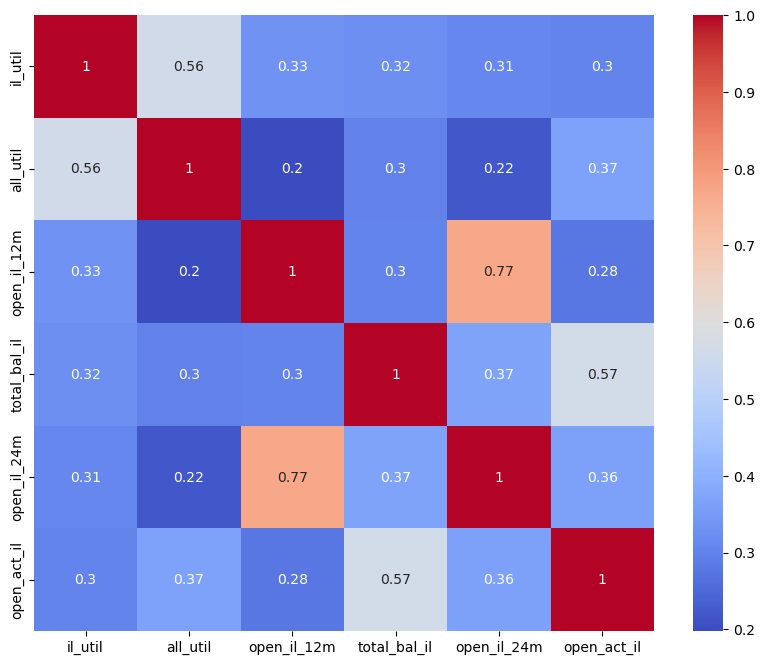

In [66]:
corr_matrix = data.corr()

# Find the column with highest correlation to il_util
highest_corr_to_il_util = corr_matrix['il_util'].sort_values(ascending=False).index[0:6]

# Create a subset of the correlation matrix using the columns in highest_corr_to_il_util
corr_subset = corr_matrix.loc[highest_corr_to_il_util, highest_corr_to_il_util]

# Plot the heatmap
plt.figure(figsize=(10,8))
sns.heatmap(corr_subset, cmap='coolwarm', annot=True)
plt.show()


In [67]:

# columns to be used as features for imputing il_util
il_util_features = ['all_util', 'open_il_12m', 'total_bal_il', 'open_il_24m', 'open_act_il']

# columns to be used as features for imputing mths_since_recent_inq
mths_since_recent_inq_features = ['mo_sin_rcnt_tl', 'mo_sin_rcnt_rev_tl_op', 'fico_range_high', 'fico_range_low']

# create a new dataframe with only the columns to be used for imputing
il_util_df = data[['il_util'] + il_util_features].dropna()
mths_since_recent_inq_df = data[['mths_since_recent_inq'] + mths_since_recent_inq_features].dropna()

# separate the dependent variable (il_util/mths_since_recent_inq) from the features
il_util_X = il_util_df[il_util_features]
il_util_y = il_util_df['il_util']
mths_since_recent_inq_X = mths_since_recent_inq_df[mths_since_recent_inq_features]
mths_since_recent_inq_y = mths_since_recent_inq_df['mths_since_recent_inq']

# create a linear regression model for each column
il_util_model = LinearRegression().fit(il_util_X, il_util_y)
mths_since_recent_inq_model = LinearRegression().fit(mths_since_recent_inq_X, mths_since_recent_inq_y)

# get indices of rows with missing values for each column
il_util_missing_indices = data[data['il_util'].isna()].index
mths_since_recent_inq_missing_indices = data[data['mths_since_recent_inq'].isna()].index

# predict missing values using the trained models and fill them in the original dataframe
if len(il_util_missing_indices) > 0:
    data.loc[il_util_missing_indices, 'il_util'] = il_util_model.predict(data.loc[il_util_missing_indices, il_util_features])
if len(mths_since_recent_inq_missing_indices) > 0:
    data.loc[mths_since_recent_inq_missing_indices, 'mths_since_recent_inq'] = mths_since_recent_inq_model.predict(data.loc[mths_since_recent_inq_missing_indices, mths_since_recent_inq_features])


In [68]:
data['il_util'] = data['il_util'].astype(int)

### emp_length

In [69]:
# Make a copy of the original DataFrame
df_clean = data.copy()

# Create a DataFrame of unique combinations of "home_ownership" and "annual_inc" with NaN values in "emp_length"
result = df_clean[df_clean['emp_length'].isna()][['home_ownership', 'annual_inc']]
result = result.drop_duplicates()

# Bin the annual_inc values into groups
result['annual_inc_range'] = pd.cut(result['annual_inc'], bins=np.arange(0, 1000000, 5000))

# Split the DataFrame into two parts: one with NaN values in "emp_length" and one without
df_with_na = df_clean[df_clean['emp_length'].isna()]
df_without_na = df_clean[df_clean['emp_length'].notna()]

# For each unique combination of "home_ownership" and "annual_inc_range" with NaN values in "emp_length",
# calculate the mode of "emp_length" for the corresponding group, and fill in the NaN values with this mode
for i in result[['home_ownership', 'annual_inc_range']].drop_duplicates().itertuples():
    a = df_without_na[(df_without_na['home_ownership'] == i.home_ownership) & 
                      (pd.cut(df_without_na['annual_inc'], bins=np.arange(0, 1000000, 5000)) == i.annual_inc_range)]
    mode_emp_length = a['emp_length'].mode()
    if len(mode_emp_length) > 0:
        df_with_na.loc[(df_with_na['home_ownership'] == i.home_ownership) & 
                       (pd.cut(df_with_na['annual_inc'], bins=np.arange(0, 1000000, 5000)) == i.annual_inc_range), 
                       'emp_length'] = mode_emp_length[0]

# Concatenate the two parts of the DataFrame back together
data = pd.concat([df_with_na, df_without_na], ignore_index=True)


In [70]:
num_instances_with_na = sum(data['emp_length'].isna())
print("Number of instances with missing emp_length:", num_instances_with_na)
print("Although there are instances with missing emp_length, the number is very low.")
print("These instances have a very low frequency in the annual income feature.")
print("Therefore, we will remove them from the data.")
data = data.dropna(subset=['emp_length'])

Number of instances with missing emp_length: 7
Although there are instances with missing emp_length, the number is very low.
These instances have a very low frequency in the annual income feature.
Therefore, we will remove them from the data.


### mths_since_rcnt_il

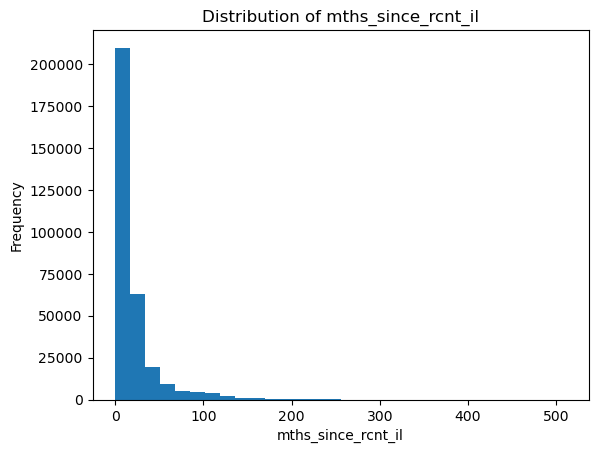

In [71]:
plt.hist(data['mths_since_rcnt_il'].dropna(), bins=30)
plt.xlabel('mths_since_rcnt_il')
plt.ylabel('Frequency')
plt.title('Distribution of mths_since_rcnt_il')
plt.show()

In [72]:
mths_mode = data["mths_since_rcnt_il"].mode().iloc[0]
data["mths_since_rcnt_il"].fillna(mths_mode, inplace=True)

### mo_sin_old_il_acct

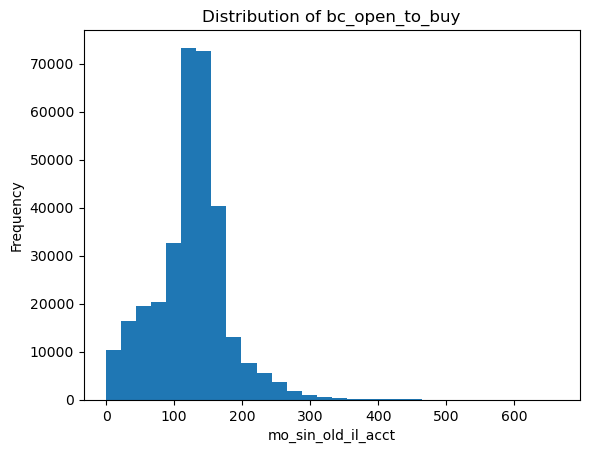

In [73]:
plt.hist(data['mo_sin_old_il_acct'].dropna(), bins=30)
plt.xlabel('mo_sin_old_il_acct')
plt.ylabel('Frequency')
plt.title('Distribution of bc_open_to_buy')
plt.show()

In [74]:
data["mo_sin_old_il_acct"].var()
mo_median = data["mo_sin_old_il_acct"].median()
data["mo_sin_old_il_acct"].fillna(mo_median, inplace=True)

### bc_util

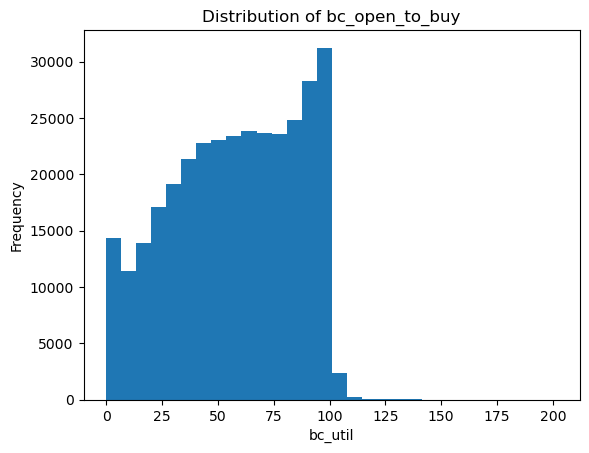

In [75]:
plt.hist(data['bc_util'].dropna(), bins=30)
plt.xlabel('bc_util')
plt.ylabel('Frequency')
plt.title('Distribution of bc_open_to_buy')
plt.show()

In [76]:
data["bc_util"].var()
bc_mean = data["bc_util"].mean()
data["bc_util"].fillna(bc_mean, inplace=True)

### percent_bc_gt_75

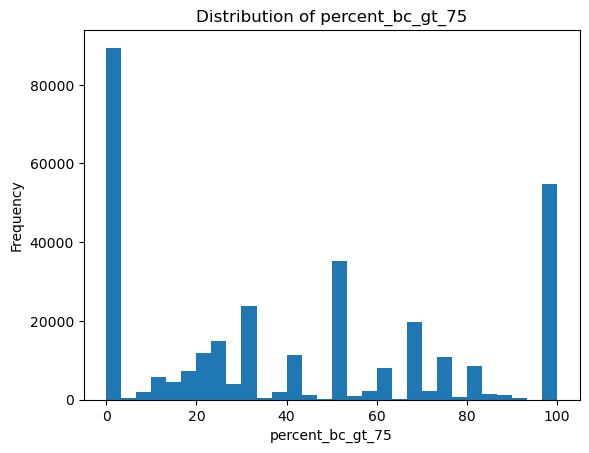

In [77]:
plt.hist(data['percent_bc_gt_75'].dropna(), bins=30)
plt.xlabel('percent_bc_gt_75')
plt.ylabel('Frequency')
plt.title('Distribution of percent_bc_gt_75')
plt.show()

In [78]:
percent_bc_gt_75_mean = data["percent_bc_gt_75"].mean()
data["percent_bc_gt_75"].fillna(percent_bc_gt_75_mean, inplace=True)

### bc_open_to_buy

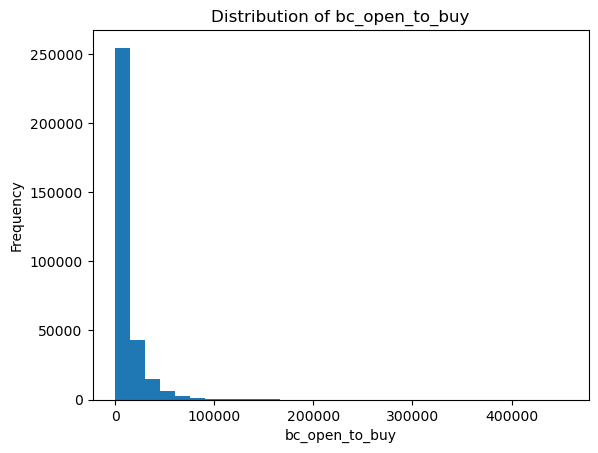

In [79]:
plt.hist(data['bc_open_to_buy'].dropna(), bins=30)
plt.xlabel('bc_open_to_buy')
plt.ylabel('Frequency')
plt.title('Distribution of bc_open_to_buy')
plt.show()

In [80]:
# fill the missing values with the median of the available values
median = data['bc_open_to_buy'].median()
data['bc_open_to_buy'].fillna(median, inplace=True)

### mths_since_recent_bc

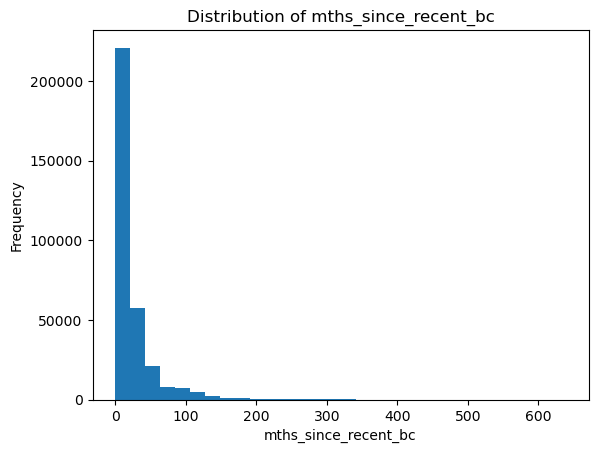

In [81]:
plt.hist(data['mths_since_recent_bc'].dropna(), bins=30)
plt.xlabel('mths_since_recent_bc')
plt.ylabel('Frequency')
plt.title('Distribution of mths_since_recent_bc')
plt.show()

In [82]:
mths_median = data["mths_since_recent_bc"].median()
data["mths_since_recent_bc"].fillna(mths_median, inplace=True)

# Find low frequency values in each feature

In [83]:
low_freq_threshold = 0.02
low_freq_values = {}

for feature in data.columns:
    if data[feature].dtype == "object":
        counts = data[feature].value_counts(normalize=True)
        low_freq = counts[counts < low_freq_threshold].index.tolist()
        if len(low_freq) > 0:
            low_freq_values[feature] = low_freq
            
for feature, values in low_freq_values.items():
    print(f"Low frequency values in feature '{feature}':")
    print(values)


Low frequency values in feature 'grade':
['G']
Low frequency values in feature 'sub_grade':
['D5', 'E1', 'E3', 'E2', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5']
Low frequency values in feature 'home_ownership':
['ANY']
Low frequency values in feature 'purpose':
['medical', 'car', 'small_business', 'moving', 'vacation', 'house', 'renewable_energy', 'wedding']
Low frequency values in feature 'addr_state':
['WA', 'MN', 'IN', 'TN', 'MO', 'CT', 'NV', 'WI', 'AL', 'SC', 'LA', 'OR', 'KY', 'OK', 'KS', 'AR', 'UT', 'MS', 'NM', 'NH', 'NE', 'HI', 'RI', 'ME', 'ID', 'DE', 'MT', 'ND', 'DC', 'AK', 'WY', 'VT', 'SD', 'WV']
Low frequency values in feature 'earliest_cr_line':
['Aug-2003', 'Sep-2003', 'Sep-2004', 'Sep-2005', 'Aug-2004', 'Aug-2002', 'Oct-2003', 'Sep-2002', 'Aug-2005', 'Oct-2004', 'Jul-2003', 'Aug-2001', 'Oct-2002', 'Nov-2004', 'Jul-2004', 'Mar-2004', 'Oct-2001', 'Aug-2000', 'Aug-2006', 'Oct-2005', 'Jun-2005', 'Mar-2005', 'Jun-2003', 'Nov-2002', 'Jul-2002', 'May-20

### grade and sub_grade

Low frequency values in 'grade' and 'sub_grade' will remain the same so that we can evaluate our model compared to the company's model.

### home_ownership

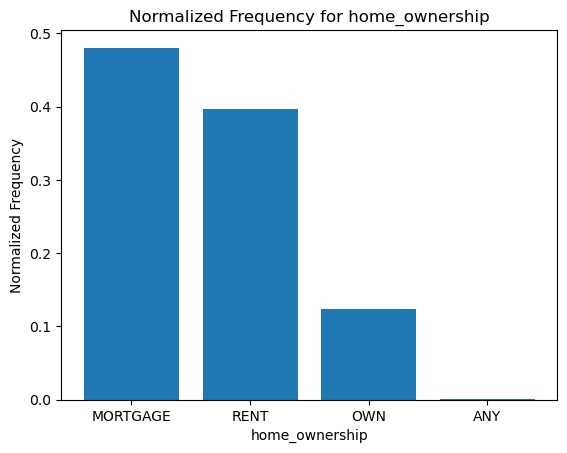

In [84]:
feature_value_counts = data['home_ownership'].value_counts(normalize=True)

plt.bar(feature_value_counts.index, feature_value_counts.values)
plt.xlabel('home_ownership')
plt.ylabel("Normalized Frequency")
plt.title("Normalized Frequency for home_ownership")
plt.show()

In [85]:
print(yield_over_percentages('home_ownership') )

  home_ownership   Count  normalize count  yield over percentages
0       MORTGAGE  157663         0.480419                0.181355
1           RENT  130016         0.396175                0.248485
2            OWN   40432         0.123201                0.210823
3            ANY      67         0.000204                0.283582


In [86]:
data['home_ownership'] = data['home_ownership'].replace('ANY', 'OTHER')

So that the model does not fall, we will have to leave a category (other) for this column (according to the data dictionary, we will include any as other)

### purpose

We will define 2 methods for handling this column and examine their level of significance later.

In [87]:
df= yield_over_percentages('purpose') 
print(df)

               purpose   Count  normalize count  yield over percentages
0   debt_consolidation  187453         0.571193                0.225166
1          credit_card   69060         0.210435                0.185665
2     home_improvement   23637         0.072025                0.180649
3                other   21707         0.066144                0.205464
4       major_purchase    7999         0.024374                0.194399
5              medical    4097         0.012484                0.226507
6                  car    3711         0.011308                0.161412
7       small_business    3625         0.011046                0.294345
8               moving    2552         0.007776                0.228056
9             vacation    2523         0.007688                0.201744
10               house    1582         0.004821                0.247155
11    renewable_energy     231         0.000704                0.225108
12             wedding       1         0.000003                0

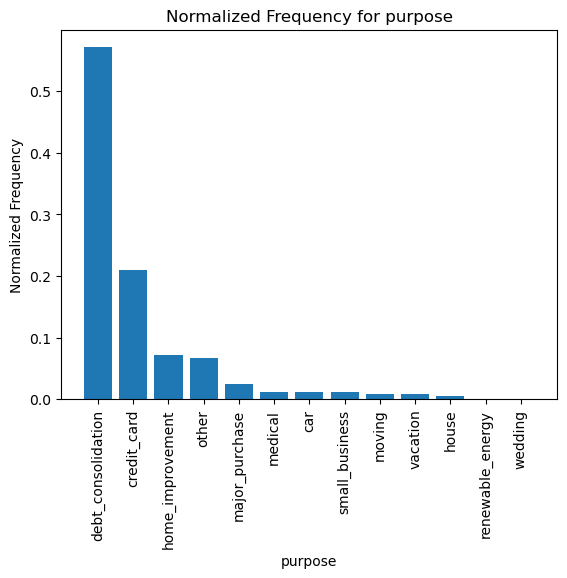

In [88]:
feature_value_counts = data['purpose'].value_counts(normalize=True)

plt.bar(feature_value_counts.index, feature_value_counts.values)
plt.xlabel('purpose')
plt.ylabel("Normalized Frequency")
plt.title("Normalized Frequency for purpose")

plt.xticks(rotation=90)
plt.show()

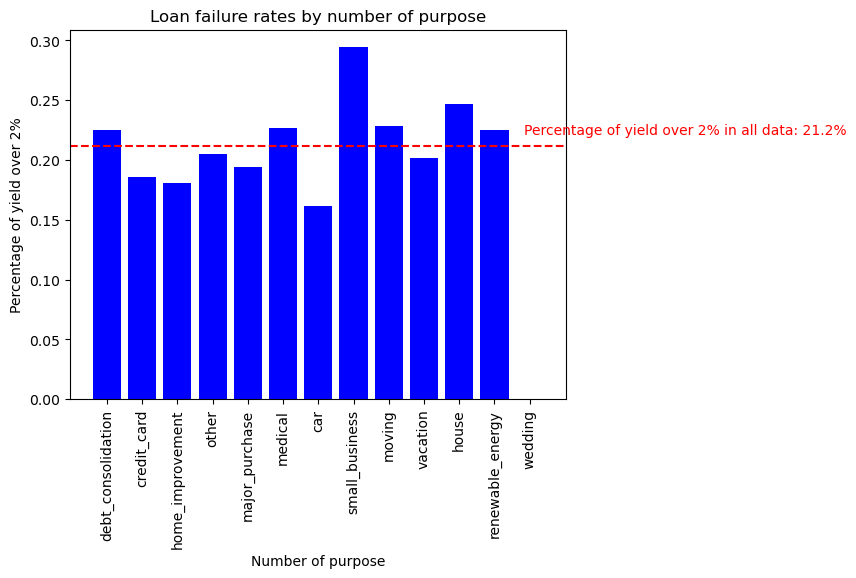

In [89]:
df = yield_over_percentages('purpose')

fig, ax = plt.subplots()

ax.bar(df['purpose'], df['yield over percentages'], color='blue')

ax.set_xlabel('Number of purpose')
ax.set_ylabel('Percentage of yield over 2%')
ax.set_title('Loan failure rates by number of purpose')
ax.set_xticks(df['purpose'])  # show every other x-axis tick label

pop_mean = 1 - data['yield_over'].mean()
ax.axhline(pop_mean, color='red', linestyle='--')
ax.text(len(df['purpose'])+8, pop_mean+0.01, f'Percentage of yield over 2% in all data: {pop_mean*100:.1f}%', color='red', ha='right')
plt.xticks(rotation=90)

plt.show()

#### method 1

we will calculare the average, the median and the standard deviation.

In [90]:
# Calculate mean, median, and standard deviation of default percentages
mean_dev = np.mean(df['yield over percentages'])
median_dev = np.median(df['yield over percentages'])
std_dev = np.std(df['yield over percentages'])

pop_mean = 1 - data['yield_over'].mean()

print("the mean of population:", pop_mean)
print("the mean is:", mean_dev)
print("the median is:", median_dev)
print("the std is:", std_dev)

the mean of population: 0.21160163082229766
the mean is: 0.19812850190776699
the median is: 0.2054636753121113
the std is: 0.06561299514298172


We will classify the level of risk associated with each loan based on the loan purpose- If the default percentage for that purpose is greater than the population mean, the value in purpose_danger will be set to 1, otherwise it will be set to 0. 

In [91]:
purpose_default_percentages = {}
for purpose in df['purpose']:
    purpose_default_percentages[purpose] = df[df['purpose'] == purpose]['yield over percentages'].values[0]

# Create new column in data indicating level of danger based on purpose
data['purpose_danger'] = data['purpose'].apply(lambda x: 1 if purpose_default_percentages[x] > pop_mean else 0)

#### method 2

We will change all the categories whose values are less than 1% of the data to other since it is impossible to rely on the reliability of this data in representing the population that is applying for the same purpose

In [92]:
data['purpose'] = data['purpose'].replace('wedding', 'other')
data['purpose'] = data['purpose'].replace('renewable_energy', 'other')
data['purpose'] = data['purpose'].replace('house', 'other')
data['purpose'] = data['purpose'].replace('vacation', 'other')
data['purpose'] = data['purpose'].replace('moving', 'other')

### addr_state

In [93]:
df= yield_over_percentages('addr_state') 
print(df)

   addr_state  Count  normalize count  yield over percentages
0          CA  45290         0.138004                0.215677
1          TX  27843         0.084841                0.215135
2          NY  26578         0.080987                0.228648
3          FL  24307         0.074067                0.224421
4          IL  12814         0.039046                0.199391
5          NJ  11698         0.035645                0.223115
6          OH  11069         0.033729                0.212937
7          GA  10821         0.032973                0.199427
8          PA  10574         0.032220                0.222338
9          NC   9340         0.028460                0.220771
10         MI   8800         0.026815                0.213523
11         VA   8712         0.026547                0.213039
12         AZ   8159         0.024862                0.206030
13         MA   7490         0.022823                0.203071
14         MD   7422         0.022616                0.229992
15      

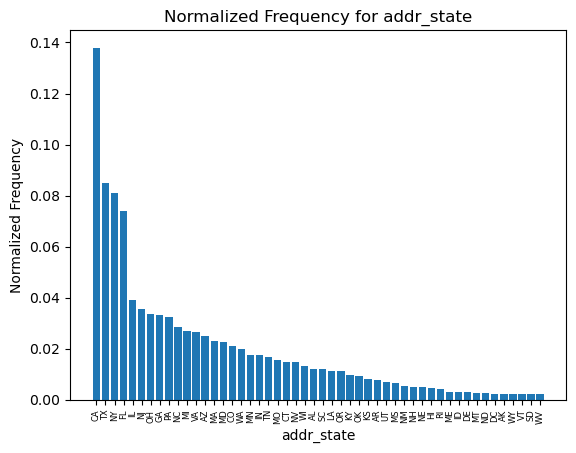

In [94]:
feature_value_counts = data['addr_state'].value_counts(normalize=True)

plt.bar(feature_value_counts.index, feature_value_counts.values)
plt.xlabel('addr_state')
plt.ylabel("Normalized Frequency")
plt.title("Normalized Frequency for addr_state")

plt.xticks(rotation=90, fontsize=6)
plt.show()


In [95]:
# Calculate mean, median, and standard deviation of default percentages
mean_dev = np.mean(df['yield over percentages'])
median_dev = np.median(df['yield over percentages'])
std_dev = np.std(df['yield over percentages'])

pop_mean = 1 - data['yield_over'].mean()

print("the mean of population:", pop_mean)
print("the mean is:", mean_dev)
print("the median is:", median_dev)
print("the std is:", std_dev)

the mean of population: 0.21160163082229766
the mean is: 0.20158993878739348
the median is: 0.20942052620134816
the std is: 0.03028087987776553


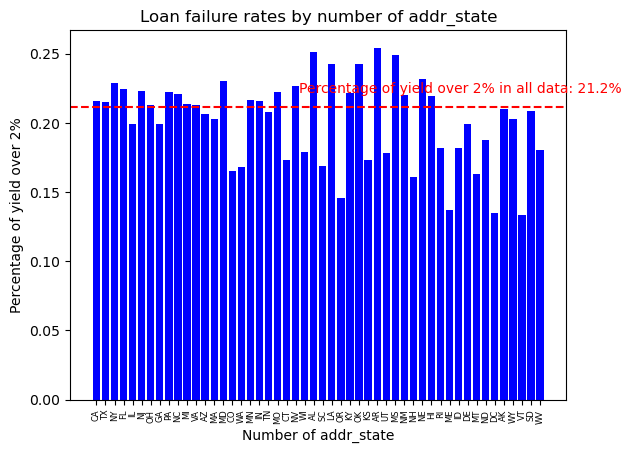

In [96]:
df = yield_over_percentages('addr_state')

fig, ax = plt.subplots()

ax.bar(df['addr_state'], df['yield over percentages'], color='blue')

ax.set_xlabel('Number of addr_state')
ax.set_ylabel('Percentage of yield over 2%')
ax.set_title('Loan failure rates by number of addr_state')
ax.set_xticks(df['addr_state'])  # show every other x-axis tick label

pop_mean = 1 - data['yield_over'].mean()
ax.axhline(pop_mean, color='red', linestyle='--')
ax.text(len(df['addr_state'])+8, pop_mean+0.01, f'Percentage of yield over 2% in all data: {pop_mean*100:.1f}%', color='red', ha='right')
plt.xticks(rotation=90, fontsize=6)

plt.show()

We will classify the level of risk associated with each loan based on the borrower's address state- If the yield over percentages for that address state is greater than the population mean, the value in addr_state_danger will be set to 1, otherwise it will be set to 0. 

In [97]:
addr_state_default_percentages = {}
for addr_state in df['addr_state']:
    addr_state_default_percentages[addr_state] = df[df['addr_state'] == addr_state]['yield over percentages'].values[0]

# Create new column in data indicating level of danger based on purpose
data['addr_state_danger'] = data['addr_state'].apply(lambda x: 1 if addr_state_default_percentages[x] > pop_mean else 0)

In [98]:
data.drop('addr_state', axis=1, inplace=True)

### earliest_cr_line

Age of credit history: The age of the borrower's credit history, which is the difference between the earliest credit line and the date the loan was issued, may be an indicator of the borrower's creditworthiness. Borrowers with longer credit histories may be seen as less risky than those with shorter credit histories, assuming they have a good credit record during that time.

In [99]:
data["earliest_cr_line"] = pd.to_datetime(data["earliest_cr_line"])
data['Age_of_credit_history']=(data['issue_d'] - data["earliest_cr_line"]).apply(lambda x: x.days/365.25)

In [100]:
data.drop('earliest_cr_line', axis=1, inplace=True)

# graphs

In [101]:
new_cols = ['loan_amnt','int_rate','emp_length','installment','annual_inc',
            'fico_range_low', 'fico_range_high','open_acc', 'pub_rec','revol_bal', 'revol_util', 'total_acc',
            'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util',
            'purpose_danger', 'addr_state_danger','is_default?','yield_over','yield_2']

merged_df = data[new_cols]

In [102]:
import pandas as pd

# Make a copy of the dataframe without the id column
#data_no_id = data.drop(['id', 'sub_grade','issue_d'], axis=1)

# Check correlations to is_default using Pearson method
corr_to_default =merged_df.corr(method='pearson')['is_default?'].sort_values(ascending=False)

# Check correlations to is_over using Pearson method
corr_to_over =merged_df.corr(method='pearson')['yield_over'].sort_values(ascending=False)

# Print the results
print("Correlations to is_default:")
print(corr_to_default)

print("\nCorrelations to is_over:")
print(corr_to_over)

Correlations to is_default:
is_default?             1.000000
int_rate                0.284484
acc_open_past_24mths    0.112344
inq_last_12m            0.077488
bc_util                 0.064427
loan_amnt               0.060319
revol_util              0.056571
installment             0.054317
purpose_danger          0.047572
addr_state_danger       0.039634
pub_rec                 0.030165
open_acc                0.030063
total_acc              -0.004758
emp_length             -0.015210
revol_bal              -0.028972
annual_inc             -0.040332
avg_cur_bal            -0.083776
bc_open_to_buy         -0.087221
fico_range_high        -0.137453
fico_range_low         -0.137454
yield_2                -0.868084
yield_over             -0.976160
Name: is_default?, dtype: float64

Correlations to is_over:
yield_over              1.000000
yield_2                 0.876723
fico_range_low          0.129653
fico_range_high         0.129652
bc_open_to_buy          0.081102
avg_cur_bal          

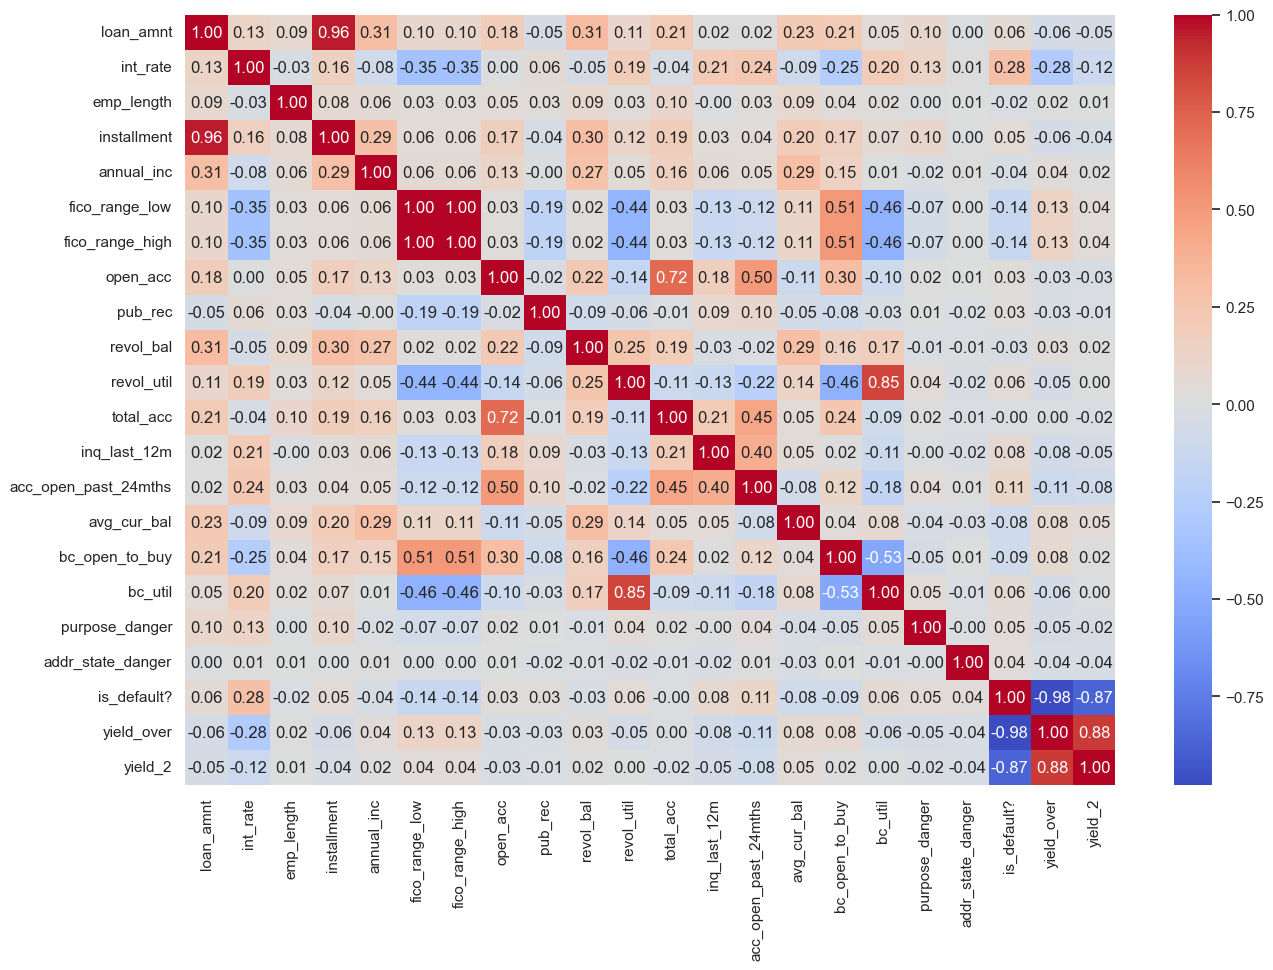

In [103]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = merged_df.corr()
sns.set(rc={'figure.figsize':(15,10)})
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, fmt=".2f")
plt.show()